In [1]:
# libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [2]:
df = pd.read_csv('cleaned_data.csv')

In [3]:
df.head()

,State Id,Program Title,ServiceCode,ServiceTitle,ActualStartDate,ActualEndDate,CompletionStatus,ServiceProviderName,CourseName,CredentialType 1,...,TrainRelatedEmp,NonTraditionalEmp,NAICSCode,QTR1A Exit,QTR2A Exit,QTR3A Exit,Year,OfficeName,JobOrderNo.,Q0 -Wages at Exit
0,37124,DC Infrastructure Academy,101,Orientation,6/18/2018,6/18/2018,Successful Completion,DC Department of Employment Services,Services to Individuals Seeking Employment,0.0,...,9.0,0.0,237990.0,0,0,0,2018,0,0.0,0.0
1,37124,DC Infrastructure Academy,102,Initial Assessment,6/18/2018,6/18/2018,Successful Completion,DC Department of Employment Services,Services to Individuals Seeking Employment,0.0,...,9.0,0.0,237990.0,0,0,0,2018,0,0.0,0.0
2,37124,DC Infrastructure Academy,138,Career Counseling,6/18/2018,6/18/2018,Successful Completion,DC Department of Employment Services,Services to Individuals Seeking Employment,0.0,...,9.0,0.0,237990.0,0,0,0,2018,0,0.0,0.0
3,37124,DC Infrastructure Academy,328,Occupational Skills Training (Non-ITA),6/18/2018,11/1/2018,Successful Completion,University of the District of Columbia (UDC),Quick Path to Energy,0.0,...,9.0,0.0,237990.0,0,0,0,2018,0,0.0,0.0
4,37124,DC Infrastructure Academy,608,1K Opportunities,6/25/2018,3/26/2019,Successful Completion,0,0,0.0,...,9.0,0.0,237990.0,0,0,0,2018,0,0.0,0.0


#### Subsetting 2: Line Graphs

In [4]:
df1 = df[['State Id', 'ServiceProviderName', 'CourseName', 'ExitDate', 'Year']]

In [5]:
df1.head()

,State Id,ServiceProviderName,CourseName,ExitDate,Year
0,37124,DC Department of Employment Services,Services to Individuals Seeking Employment,1/25/2019,2018
1,37124,DC Department of Employment Services,Services to Individuals Seeking Employment,1/25/2019,2018
2,37124,DC Department of Employment Services,Services to Individuals Seeking Employment,1/25/2019,2018
3,37124,University of the District of Columbia (UDC),Quick Path to Energy,1/25/2019,2018
4,37124,0,0,1/25/2019,2018


In [6]:
df1 = df1.sort_values(by=['Year', 'State Id', 'ExitDate'], ascending = (True, True, False))

In [7]:
df1.head(10)

,State Id,ServiceProviderName,CourseName,ExitDate,Year
400,2181,DC Department of Employment Services,Services to Individuals Seeking Employment,5/20/2019,2018
401,2181,DC Department of Employment Services,Services to Individuals Seeking Employment,5/20/2019,2018
402,2181,DC Department of Employment Services,Services to Individuals Seeking Employment,5/20/2019,2018
403,2181,DC Department of Employment Services,Services to Individuals Seeking Employment,5/20/2019,2018
430,3916,DC Department of Employment Services,Services to Individuals Seeking Employment,1/23/2020,2018
431,3916,DC Department of Employment Services,Services to Individuals Seeking Employment,1/23/2020,2018
432,3916,DC Department of Employment Services,Services to Individuals Seeking Employment,1/23/2020,2018
433,3916,DC Department of Employment Services,Services to Individuals Seeking Employment,1/23/2020,2018
434,3916,DC Department of Employment Services,Services to Individuals Seeking Employment,1/23/2020,2018
435,3916,Department of Public Works,Quick Path to Transportation (CDL),1/23/2020,2018


In [8]:
df1.shape

(1357, 5)

In [9]:
df1 = df1.drop_duplicates(subset = ['State Id'], keep='first')

In [10]:
df1.head()

,State Id,ServiceProviderName,CourseName,ExitDate,Year
400,2181,DC Department of Employment Services,Services to Individuals Seeking Employment,5/20/2019,2018
430,3916,DC Department of Employment Services,Services to Individuals Seeking Employment,1/23/2020,2018
850,4831,DC Department of Employment Services,Services to Individuals Seeking Employment,3/2/2020,2018
379,5859,DC Department of Employment Services,Services to Individuals Seeking Employment,2/26/2020,2018
223,6667,0,0,3/2/2020,2018


In [11]:
df1.shape

(492, 5)

#### Line Graph 1: Total Number by Service Provider

In [12]:
df2 = df1[['Year', 'ServiceProviderName', 'State Id']].groupby(['Year', 'ServiceProviderName']).count()

In [13]:
df2

State Id
Year ServiceProviderName                                         
2018 0                                                         12
     CC Prep - MLK                                             17
     Community Tech LLC                                         1
     DC Department of Employment Services                     148
     DC Department of Fire & Emergency Services                 1
     Excel Automotive Institute                                 6
     GRID Alternatives Mid-Atlantic                            12
     ITC Technologies LLC                                       2
     The Training Zone of the DMV                              65
     University of the District of Columbia (UDC)               1
2019 CC Prep - MLK                                             15
     DC Department of Employment Services                       1
     DC Department of Fire & Emergency Services                 7
     Excel Automotive Institute                                 4
     GRID Alternatives Mid-Atlantic                            19
     ITC Technologies LLC                                       7
     Opportunities Industrialization Center of Washi...         4
     Pepco Holdings, Inc.                                       6
     The Training Zone of the DMV                             109
     Toni Thomas Associates                                     2
     University of the District of Columbia (UDC)              12
2020 CNI, LLC                                                   6
     Pepco Holdings, Inc.                                       4
     The Training Zone of the DMV                               2
     University of the District of Columbia (UDC)               9
2021 Art and Soul Solutions, Inc.                               2
     DC Department of Employment Services                      15
     DC Department of Insurance, Securities and Banking         1
     GRID Alternatives Mid-Atlantic                             1
     University of the District of Columbia (UDC)               1

In [14]:
df2 = df2.reset_index()
df2 = df2.rename(columns = {"State Id": "Number Employed"})

In [15]:
df2.head()

,Year,ServiceProviderName,Number Employed
0,2018,0,12
1,2018,CC Prep - MLK,17
2,2018,Community Tech LLC,1
3,2018,DC Department of Employment Services,148
4,2018,DC Department of Fire & Emergency Services,1


In [16]:
df2_long = df2.pivot_table(index='Year', columns='ServiceProviderName', values='Number Employed').reset_index()

In [17]:
df2_long = df2_long.fillna(0)

In [18]:
df2_long = df2_long.set_index('Year')

In [19]:
df2_long

ServiceProviderName,0,"Art and Soul Solutions, Inc.",CC Prep - MLK,"CNI, LLC",Community Tech LLC,DC Department of Employment Services,DC Department of Fire & Emergency Services,"DC Department of Insurance, Securities and Banking",Excel Automotive Institute,GRID Alternatives Mid-Atlantic,ITC Technologies LLC,Opportunities Industrialization Center of Washington-OIC/DC,"Pepco Holdings, Inc.",The Training Zone of the DMV,Toni Thomas Associates,University of the District of Columbia (UDC)
Year,,,,,,,,,,,,,,,,
2018,12.0,0.0,17.0,0.0,1.0,148.0,1.0,0.0,6.0,12.0,2.0,0.0,0.0,65.0,0.0,1.0
2019,0.0,0.0,15.0,0.0,0.0,1.0,7.0,0.0,4.0,19.0,7.0,4.0,6.0,109.0,2.0,12.0
2020,0.0,0.0,0.0,6.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,4.0,2.0,0.0,9.0
2021,0.0,2.0,0.0,0.0,0.0,15.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0


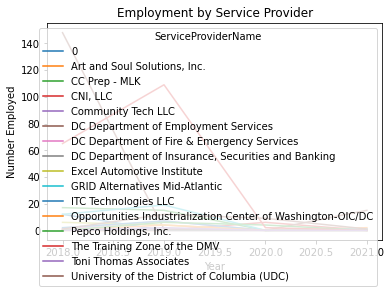

In [20]:
## comparing service providers
df2_long.plot(kind='line')
plt.title('Employment by Service Provider')
plt.ylabel('Number Employed')
plt.xlabel('Year')
plt.savefig('line_graph.png', dpi=300, bbox_inches='tight')
plt.show()


#### Line Graph 2: Total Number by Course Name

In [21]:
df3 = df1[['Year', 'CourseName', 'State Id']].groupby(['Year', 'CourseName']).count()

In [22]:
df3

State Id
Year CourseName                                          
2018 0                                                 12
     Automotive Foundations                             6
     First Aid/CPR/AED Training                         1
     Flagger/OSHA 10 Safety Training                   65
     Help Desk IT Training                             19
     Quick Path to Energy                               1
     Services to Individuals Seeking Employment       148
     Solar Works                                       12
     Work Readiness                                     1
2019 Automotive Foundations                             3
     Automotive- Brakes                                 1
     Cisco Certified Network Associate (CCNA)           7
     Commercial Driver's License Class B                2
     CompTIA A+                                         4
     First Aid/CPR/AED Training                         7
     Flagger/OSHA 10 Safety Training                   91
     Help Desk IT Training                             15
     OSHA 30                                           18
     Pepco Utility Training Class                       6
     Quick Path to Energy                              12
     Services to Individuals Seeking Employment         1
     Solar Works                                       19
2020 Flagger/OSHA 10 Safety Training                    1
     OSHA 30                                            1
     Pepco Utility Training Class                       4
     Quick Path to Energy                               9
     Washington Gas Training Program                    6
2021 Bank on DC                                         1
     Fundamentals of Information Technology             1
     Services to Individuals Seeking Employment        15
     Solar Works                                        1
     Workforce Readiness Training                       2

In [23]:
df3 = df3.reset_index()
df3 = df3.rename(columns = {"State Id": "Number Employed"})

In [24]:
df3_long = df3.pivot_table(index='Year', columns='CourseName', values='Number Employed').reset_index()

In [25]:
df3_long = df3_long.fillna(0)

In [26]:
df3_long = df3_long.set_index('Year')

In [27]:
df3_long

CourseName,0,Automotive Foundations,Automotive- Brakes,Bank on DC,Cisco Certified Network Associate (CCNA),Commercial Driver's License Class B,CompTIA A+,First Aid/CPR/AED Training,Flagger/OSHA 10 Safety Training,Fundamentals of Information Technology,Help Desk IT Training,OSHA 30,Pepco Utility Training Class,Quick Path to Energy,Services to Individuals Seeking Employment,Solar Works,Washington Gas Training Program,Work Readiness,Workforce Readiness Training
Year,,,,,,,,,,,,,,,,,,,
2018,12.0,6.0,0.0,0.0,0.0,0.0,0.0,1.0,65.0,0.0,19.0,0.0,0.0,1.0,148.0,12.0,0.0,1.0,0.0
2019,0.0,3.0,1.0,0.0,7.0,2.0,4.0,7.0,91.0,0.0,15.0,18.0,6.0,12.0,1.0,19.0,0.0,0.0,0.0
2020,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,4.0,9.0,0.0,0.0,6.0,0.0,0.0
2021,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,15.0,1.0,0.0,0.0,2.0


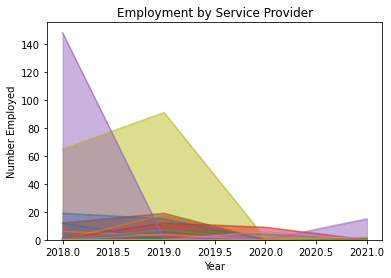

In [30]:
## comparing service providers
df3_long.plot(kind='area', legend=None)
plt.title('Employment by Service Provider')
plt.ylabel('Number Employed')
plt.xlabel('Year')
plt.savefig('line_graph.png', dpi=300, bbox_inches='tight')
plt.show()